# Pairplotr introduction
Here I introduce pairplotr, a tool I developed to do pairwise plots of features, including mixtures of numerical and categorical ones, starting from a cleaned Pandas dataframe with neither missing data nor data id columns.   

This demo imports an already cleaned Titanic dataset and demonstrates certain features of pyplotr.

## Plot description
Plot details vary according to whether they are on- or off-diagonal and whether the intersecting rows and columns correspond to numerical or categorical variables.

All descriptions assume the first row/column has index 1.

Here's a description of the types of subplot encountered:

- On-diagonal:
  - Categorical feature:
    - Horizontal bar chart of the counts of each feature value colored according to that value.
      - It, along with y-tick labels on the left of the grid, acts as a legend for the row feature values.
        - See example below for how this works.
  - Numerical feature:
    - Histogram of feature.
- Off-diagonal:
  - Categorical feature row and categorical feature column.
    - Horizontal stacked bar chart of row feature for each value of the column feature and colored accordingly.
  - Categorical feature row and Numerical feature column.
    - Overlapping histograms of column feature for each value of the row feature and colored accordingly.
  - Numerical feature row and Numerical feature column.
    - Scatter plot of row feature veruss column feature.
      - Optionally, colored by a feature dictated by scatter_plot_filter keyword argument.
      
# Import dependencies

In [2]:
%matplotlib inline

import sys

import pairplotr.pairplotr as ppr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Unpickle data

In [3]:
df = pd.read_pickle('trimmed_titanic_data.pkl')

# Inspect data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


Note, how the data has no missing values. This is required for the current version of pairplotr.

In [5]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
5,0,3,male,35.050324,0,0,8.4583,Q,Mr
6,0,1,male,54.000000,0,0,51.8625,S,Mr
7,0,3,male,2.000000,3,1,21.0750,S,Child
8,1,3,female,27.000000,0,2,11.1333,S,Mrs
9,1,2,female,14.000000,1,0,30.0708,C,Mrs


Additionally, the data must have no fields that could be considered an id. For instance, the Titanic survival dataset had a PassengerId field that I removed. The reason for this is to avoid a high number of categorical feature values that causes the code to slow to a crawl. 

# Set categorical features as that type
The first step, starting from squeaky clean data, is to set categorical features as such:

In [6]:
visualize_df = df.copy()

categorical_features = ['Survived','Pclass','Sex','Embarked','Title','Parch','SibSp']

for feature in categorical_features:
    visualize_df[feature] = visualize_df[feature].astype('category')
    
visualize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null category
Parch       891 non-null category
Fare        891 non-null float64
Embarked    891 non-null category
Title       891 non-null category
dtypes: category(7), float64(2)
memory usage: 20.3 KB


Note, Parch and SibSp are numerical, though I find it easier to visualize them as categories because there are so few values for them (max 8).

Now that the desired types have been stored in a dictionary we can move on to graphing the pair plot.

# Example pairplot and interpretation
To plot all pair-wise features simply run the compare_data() method like this:

CPU times: user 8.23 s, sys: 161 ms, total: 8.39 s
Wall time: 8.57 s


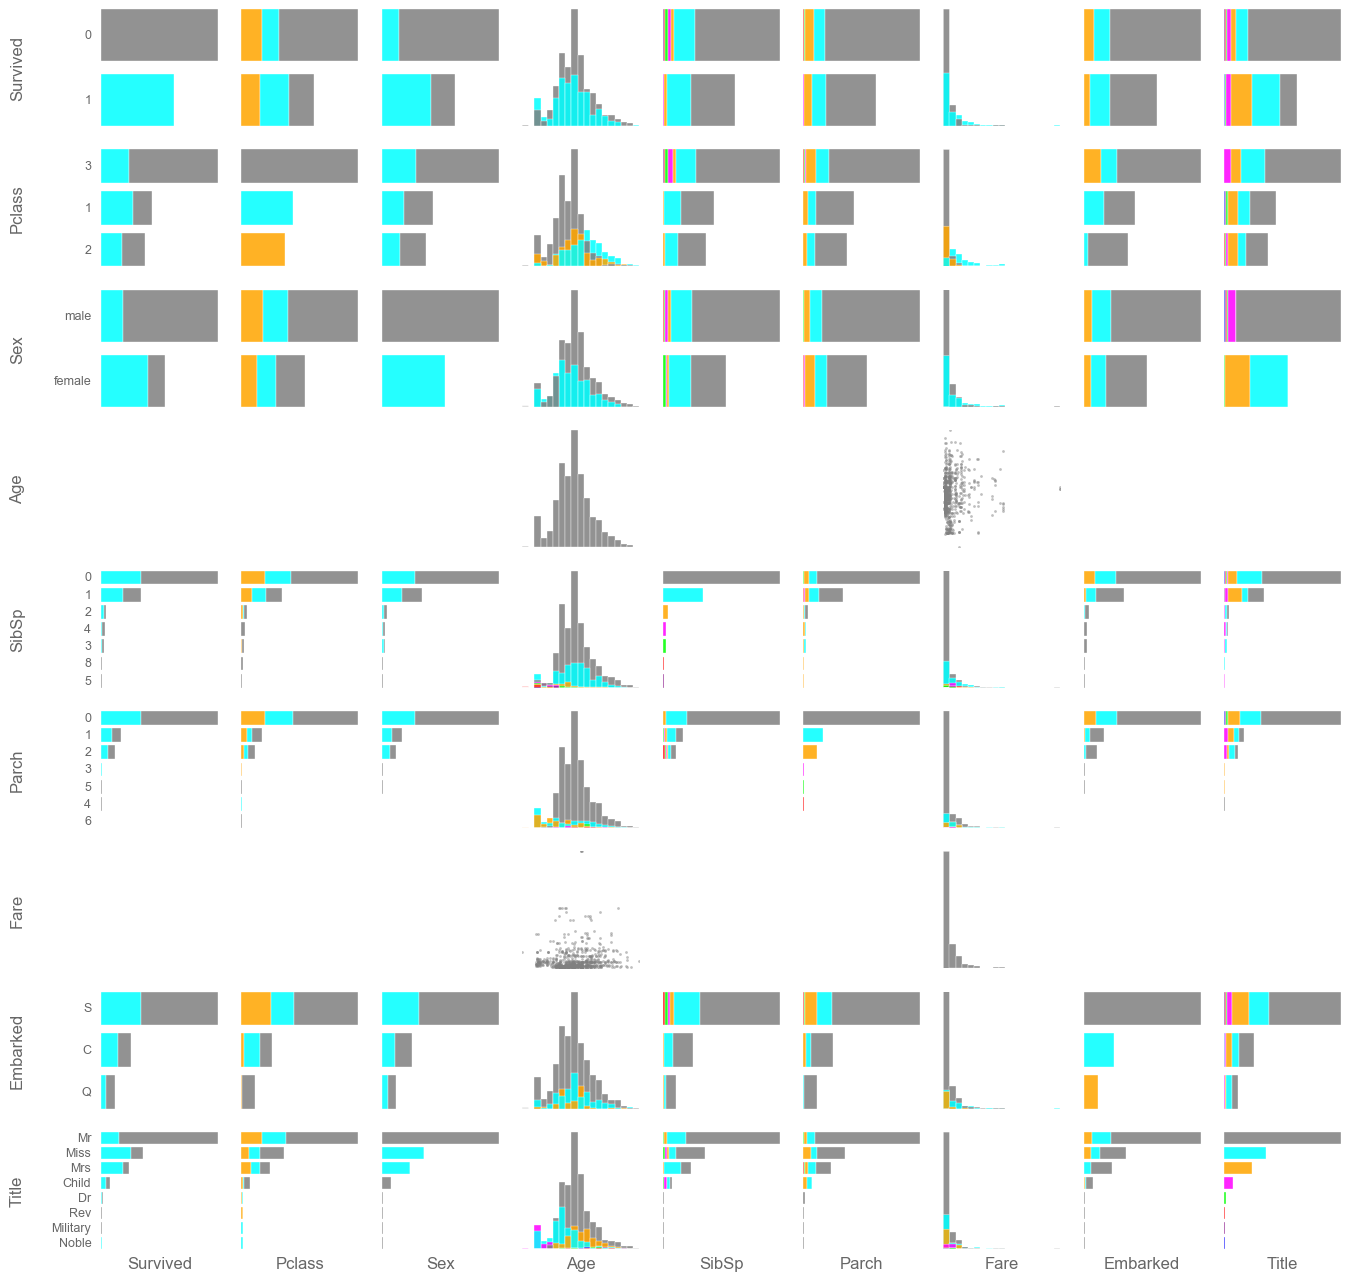

In [7]:
%%time
ppr.compare_data(visualize_df,fig_size=16)

We can also select specific features to graph using the plot_vars keyword argument:

CPU times: user 2.18 s, sys: 36.2 ms, total: 2.22 s
Wall time: 2.24 s


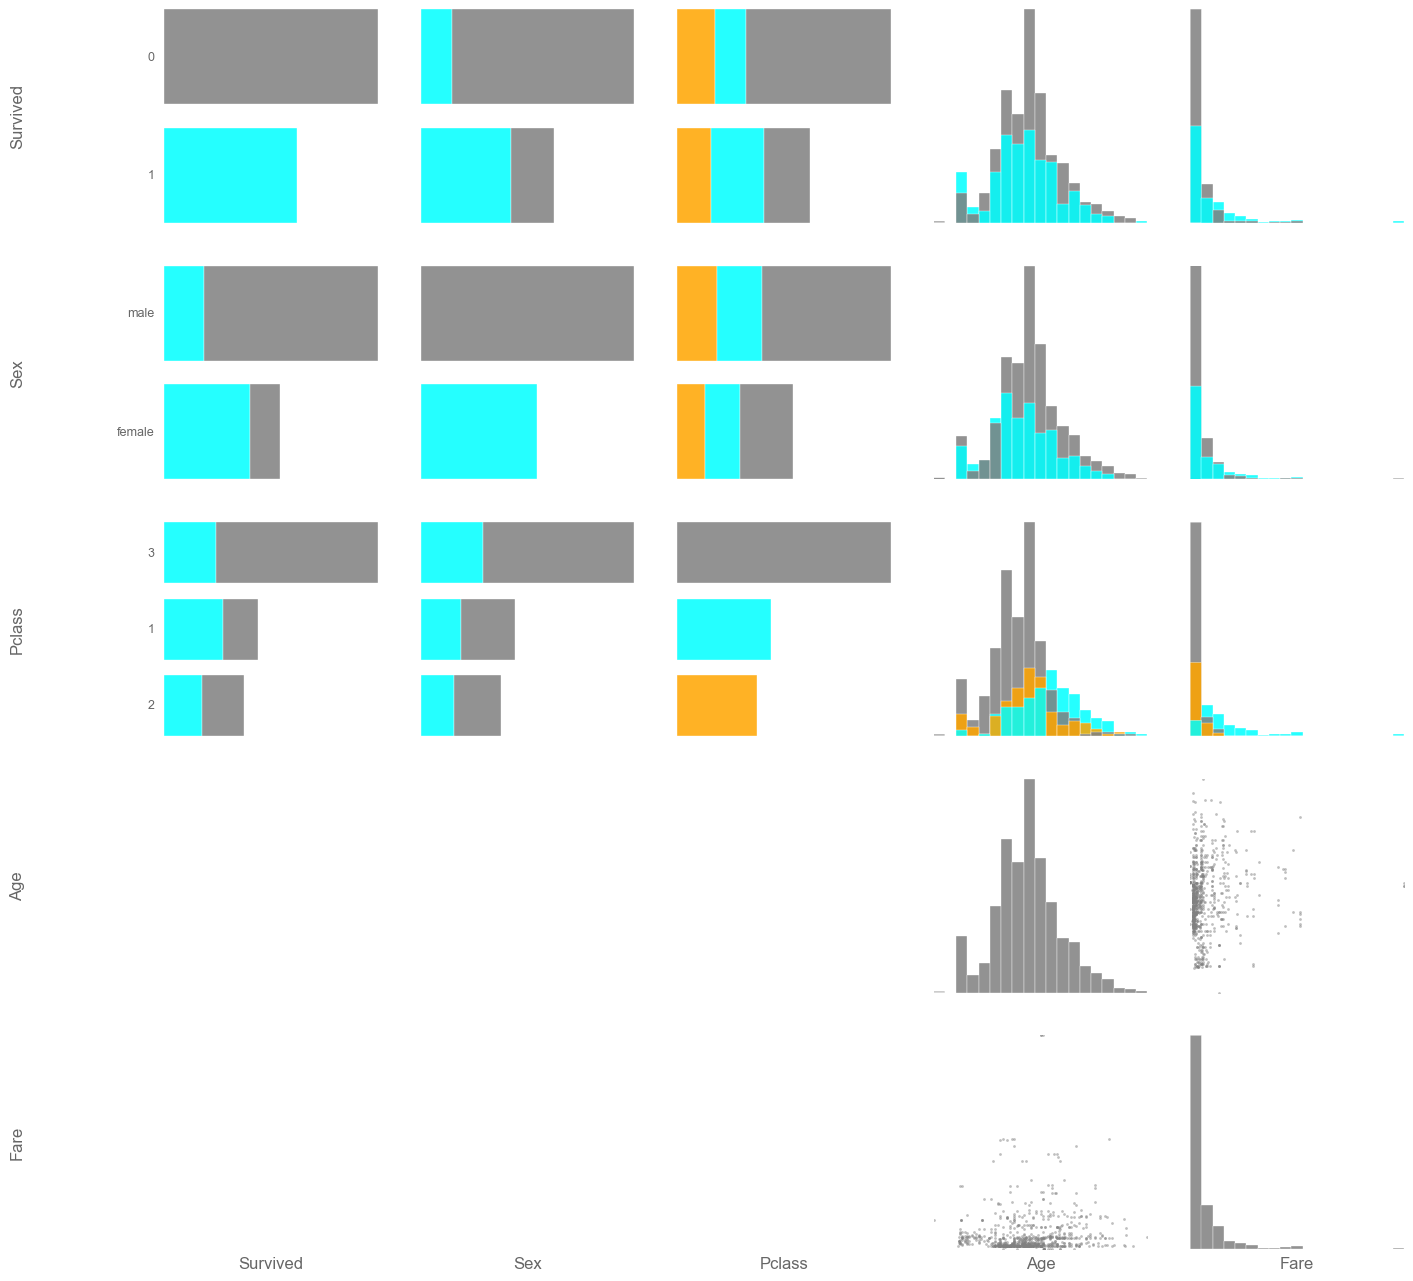

In [8]:
%%time
ppr.compare_data(visualize_df,fig_size=16,plot_vars=['Survived','Sex','Pclass','Age','Fare'])

We can zoom in on individual plots by using the zoom keyword argument:

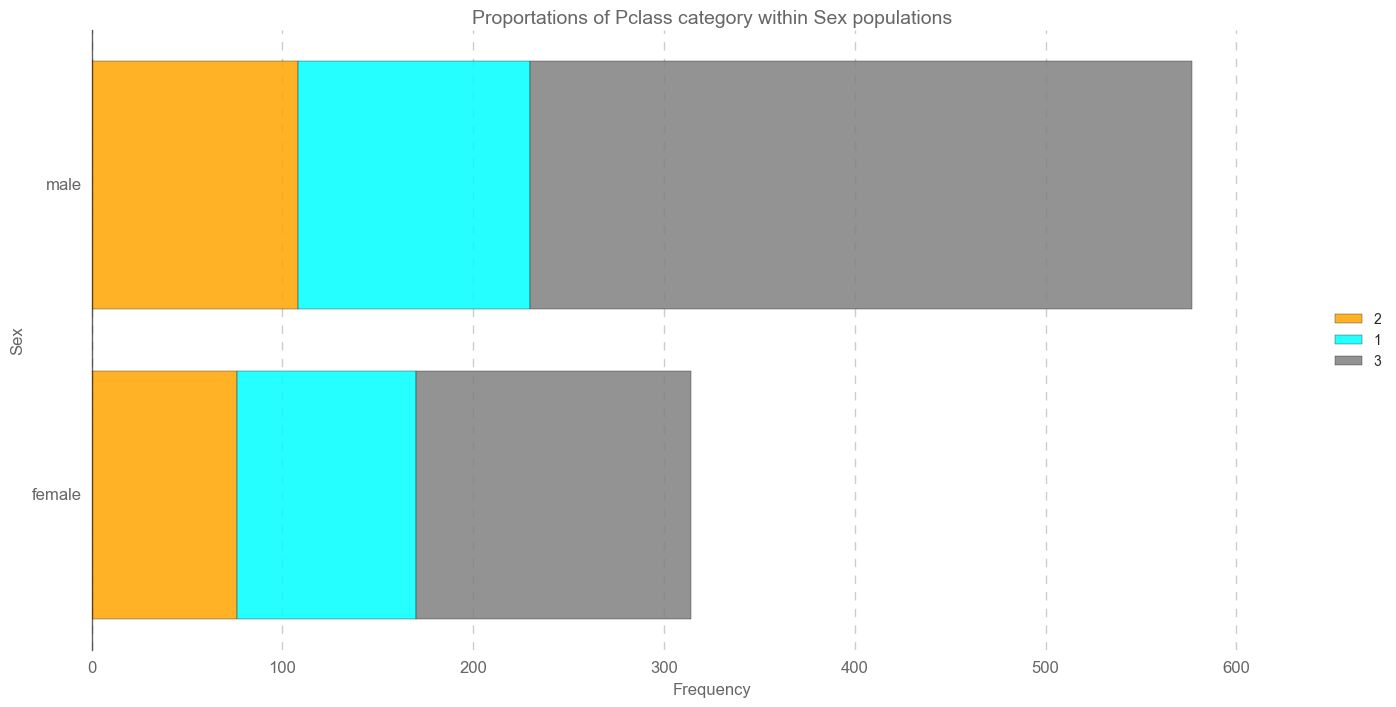

CPU times: user 640 ms, sys: 81.7 ms, total: 722 ms
Wall time: 502 ms


In [9]:
%%time
ppr.compare_data(visualize_df,fig_size=16,zoom=['Sex','Pclass'])

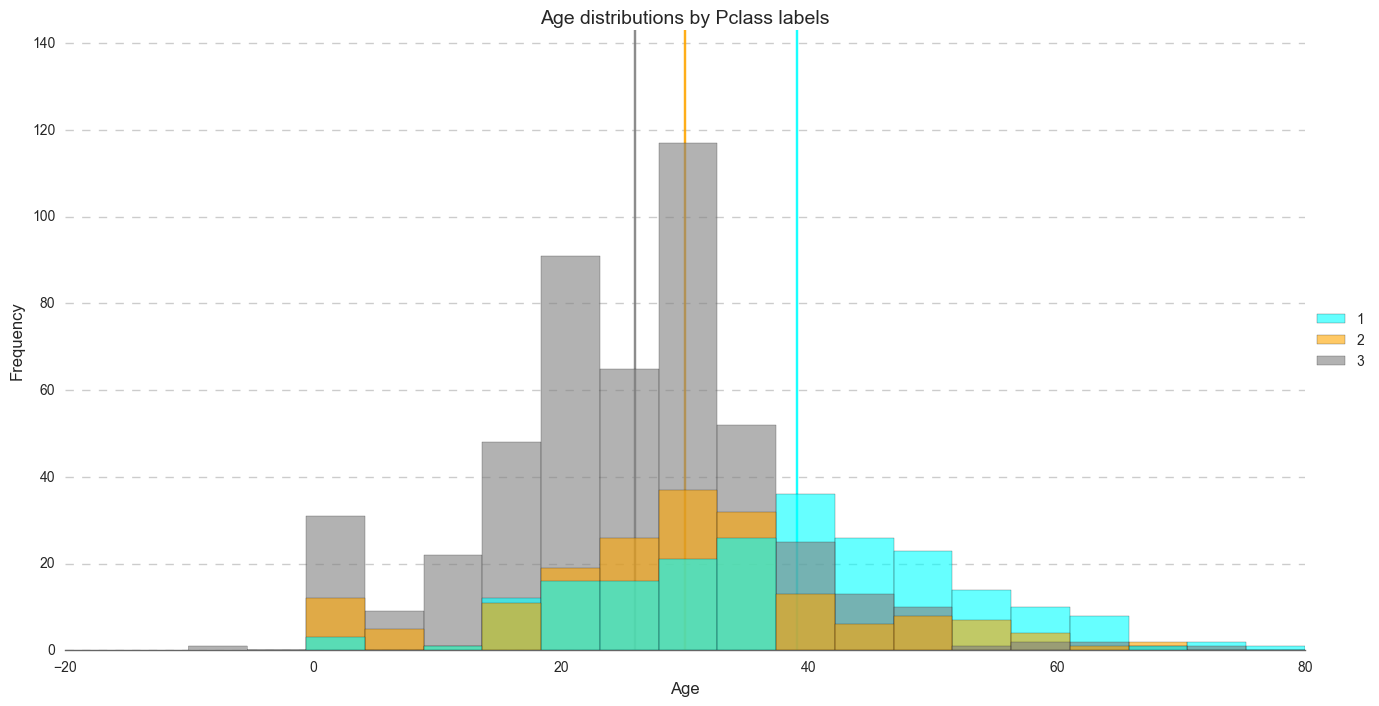

CPU times: user 953 ms, sys: 108 ms, total: 1.06 s
Wall time: 845 ms


In [10]:
%%time
ppr.compare_data(visualize_df,fig_size=16,zoom=['Pclass','Age'],plot_medians=True)

Note how there is now a scale for the Age feature and the frequencies corresponding to each bin.

This currently only works for category vs category and category vs numerical comparisons and only for different features. This will be changed soon.

Additionally, we can make it so that numerical vs numerical feature comparisons highlight points based on a particular color using the scatter_plot_filter keyword argument:

CPU times: user 8.4 s, sys: 110 ms, total: 8.51 s
Wall time: 8.78 s


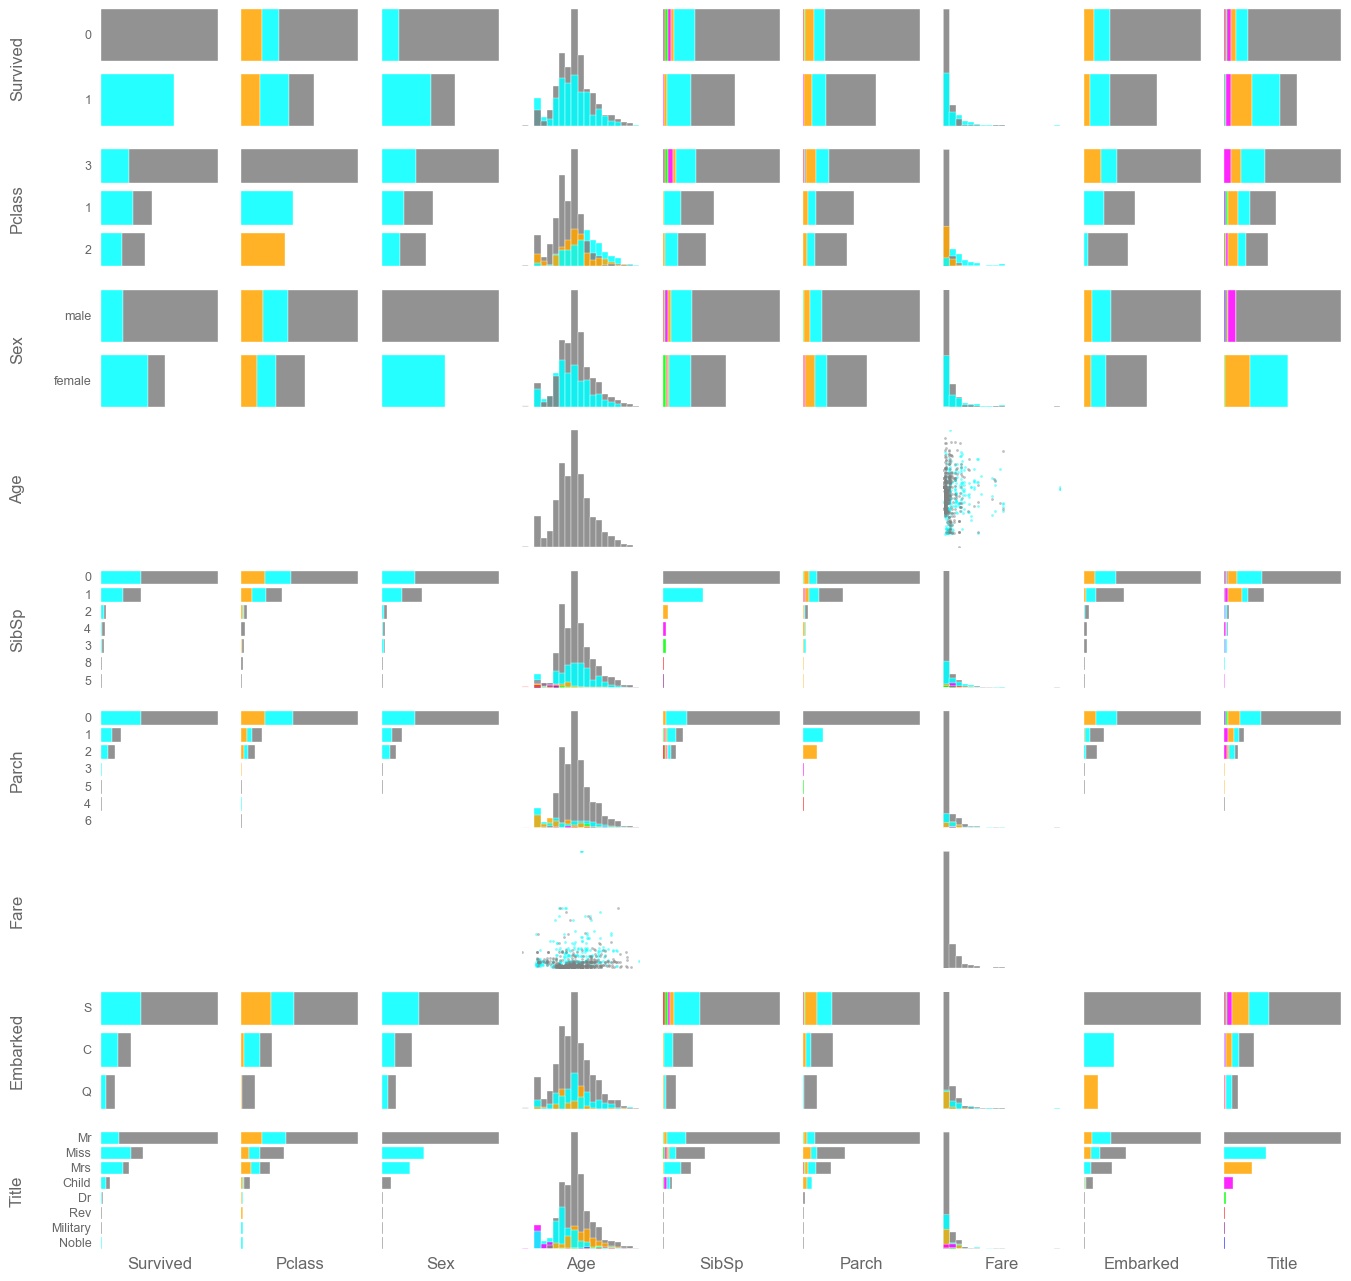

In [11]:
%%time
ppr.compare_data(visualize_df,fig_size=16,scatter_plot_filter='Survived')

Here is an example interpretation using pairplotr:

Row/column 1/1 indicates that survival (1) and death (0) are indicated by cyan and gray, respectively.

Row/column 3/1 indicates that most women survived (I'd guess about ~80%). 

Row/column 3/2 indicates that more than half of all women were from Pclasses 1 and 2. This makes me curious about what characteristics women from Pclass 3 might have.

We can slice the data using normal Pandas notation and use it with pairplotr. Here's an example that investigates women from Pclass 3:

CPU times: user 7.83 s, sys: 59.1 ms, total: 7.89 s
Wall time: 8 s


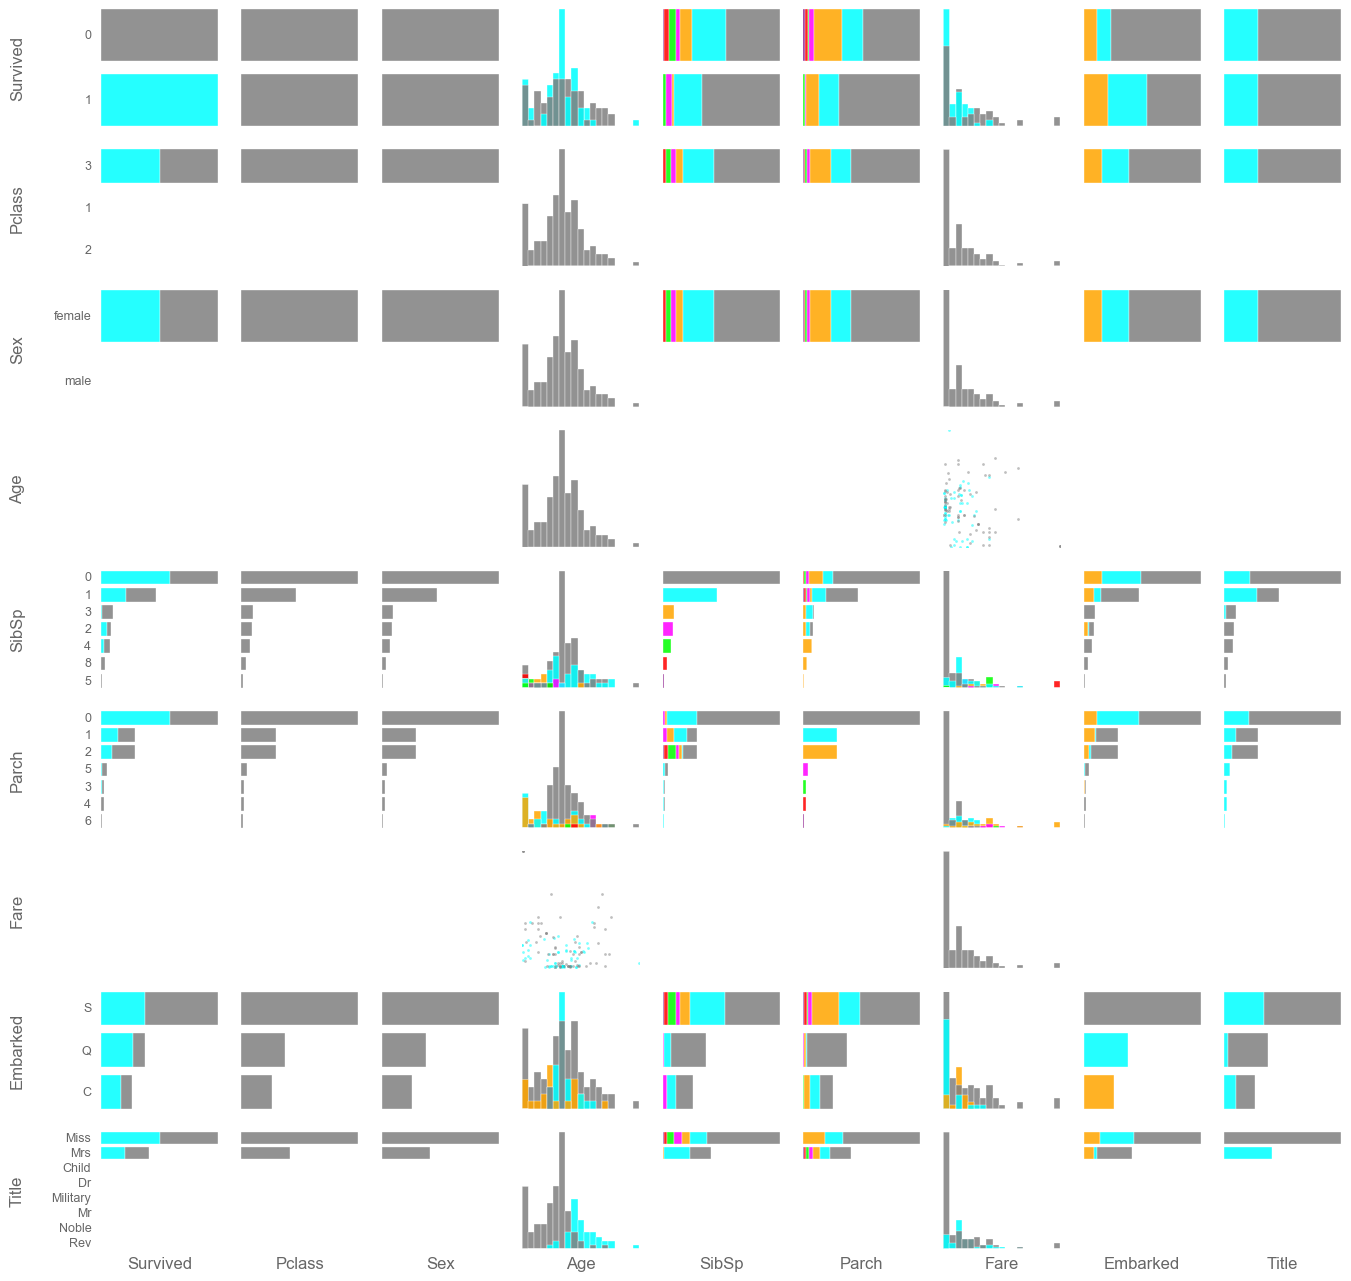

In [12]:
%%time

where = (visualize_df['Sex']=='female')&(visualize_df['Pclass']==3) # Women from Pclass 3

ppr.compare_data(visualize_df[where],scatter_plot_filter='Survived')

Row/column 1/1 automatically shows that only about half of Pclass 3 women survived.

Row/column 8/1 is interesting. It seems to indicate that most women from Embarked values Q and C survived, while the bulk of Pclass 3 women from Embarked S died.

Row/column pairs 8/5 and 8/6 seem to indicate that Embarked S had a higher concentration of larger amounts of Siblings/Spouses and Parents/Childen. 

Additionally, row/colum pairs 5/1 and 6/1 seem to indicate that women with less family had a better chance to survive. Here I zoom in on these two figures to check:

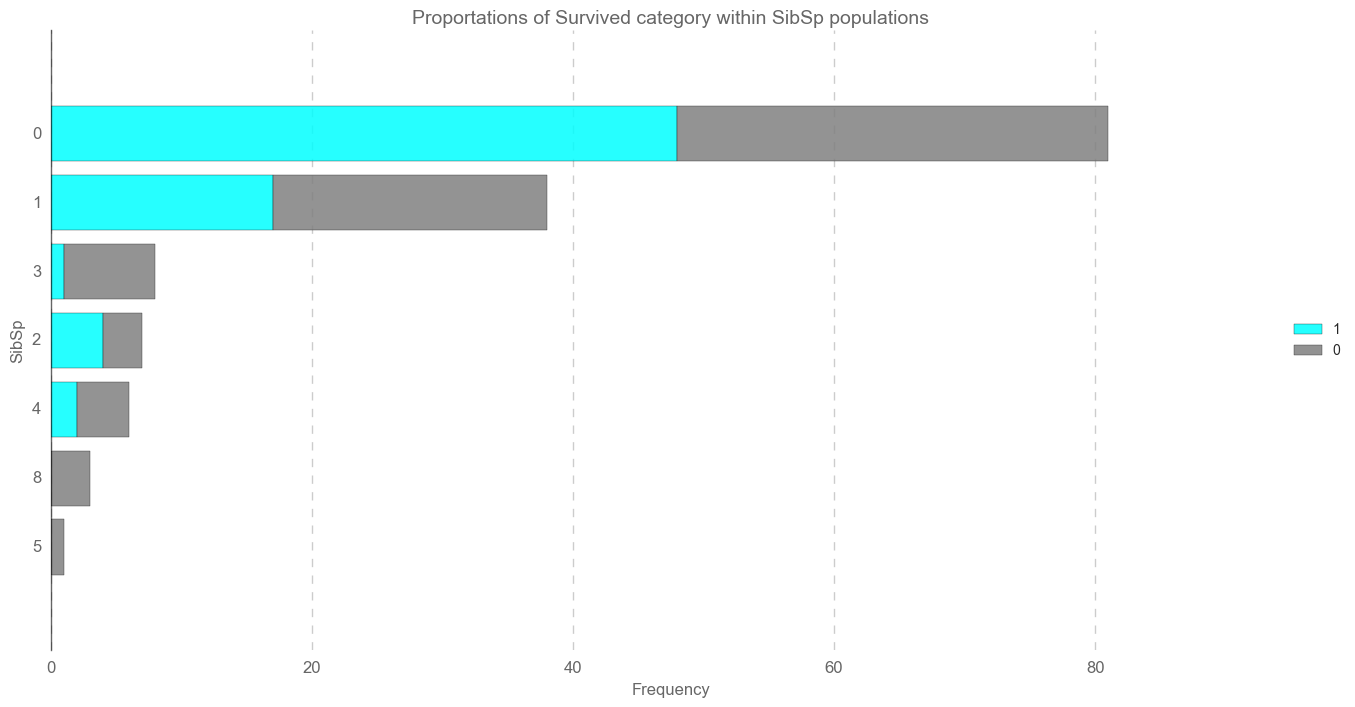

CPU times: user 692 ms, sys: 84.4 ms, total: 777 ms
Wall time: 544 ms


In [13]:
%%time

where = (visualize_df['Sex']=='female')&(visualize_df['Pclass']==3) # Women from Pclass 3

ppr.compare_data(visualize_df[where],scatter_plot_filter='Survived',zoom=['SibSp','Survived'])

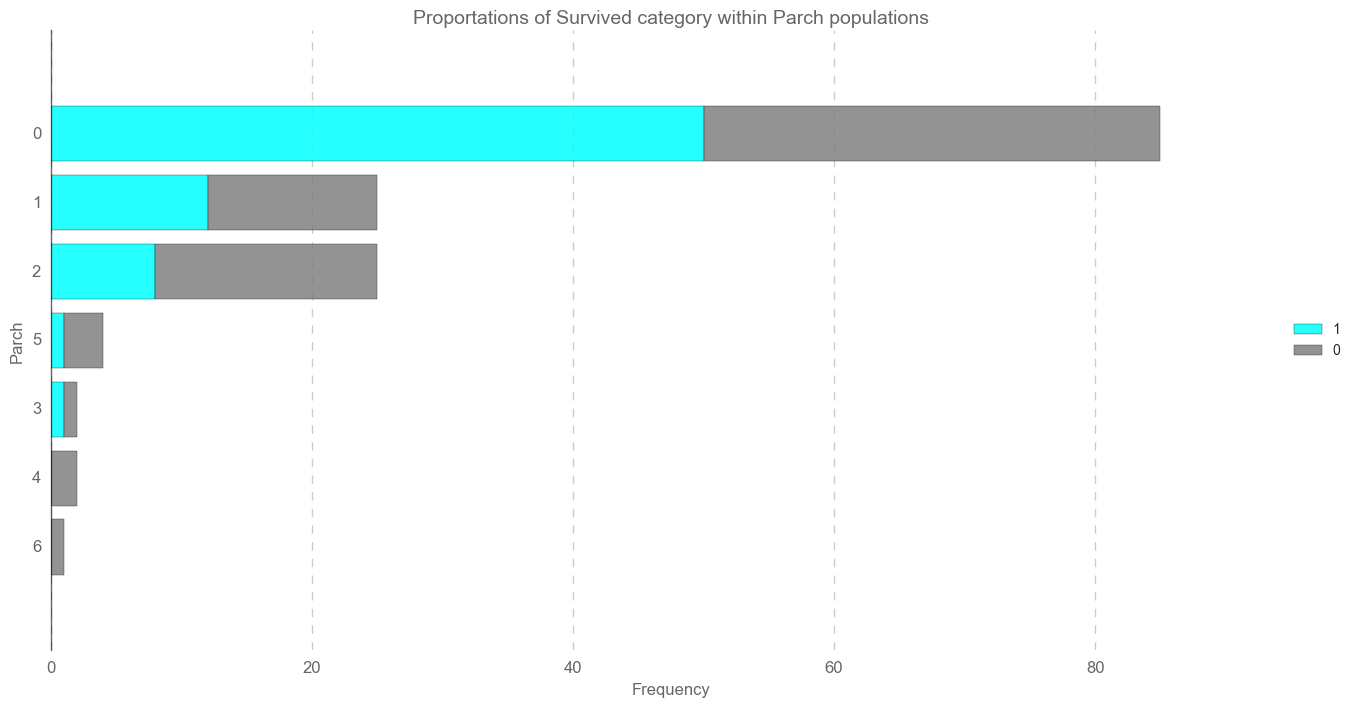

CPU times: user 692 ms, sys: 83.6 ms, total: 775 ms
Wall time: 586 ms


In [14]:
%%time

where = (visualize_df['Sex']=='female')&(visualize_df['Pclass']==3) # Women from Pclass 3

ppr.compare_data(visualize_df[where],scatter_plot_filter='Survived',zoom=['Parch','Survived'])

Indeed, more than half of Pclass 3 women with no family survived while less than half did with otherwise. 

# Summary
I've introduced pairplotr and showed how to set features as categorical, graph mixed numerical/categorical features, restrict the graphed features, and zoom in on individual plots, graph subsets of the data. Additionally, I demonstrated a simple interpretation of the Titanic dataset.

I hope you find this tool useful and please give me any suggestions for improving it.